# Linear Regression

# 📘 Introduction to Linear Regression

Linear Regression is one of the simplest and most powerful algorithms in machine learning. It helps us to understand the relationship between input (features) and output (target).

### 📌 Goal:
Predict a continuous value (e.g., house price, salary, marks).

We will cover:
1. What is Regression?
2. What is Loss?
3. What is Gradient Descent?
4. How weights are updated?
5. How cost is minimized?
6. Exploratory Data Analysis (EDA) on a real-world dataset
7. Train a Linear Regression model
8. Try Regularized models (Ridge and Lasso)
9. Add Polynomial Regression and Hyperparameter Tuning
10. Predict on test data and evaluate

Let's begin!

In [1]:
# --- SECTION 2: Imports and Setup ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Set visual style
sns.set(style="whitegrid")

# 🔍 What is Linear Regression?

Linear Regression tries to fit a line that best represents the data.

### Equation:
y = wx + b

Where:
- y = predicted value
- x = input feature
- w = weight (slope of line)
- b = bias (intercept)

Our goal is to find the best w and b such that predictions are close to the actual values.

# ⚠️ What is Loss?

Loss tells us how far off our prediction is from the actual value.

### Common Loss Function: Mean Squared Error (MSE)
MSE = (1/n) * sum((y_true - y_pred)^2)

Smaller the MSE, better our model is performing.

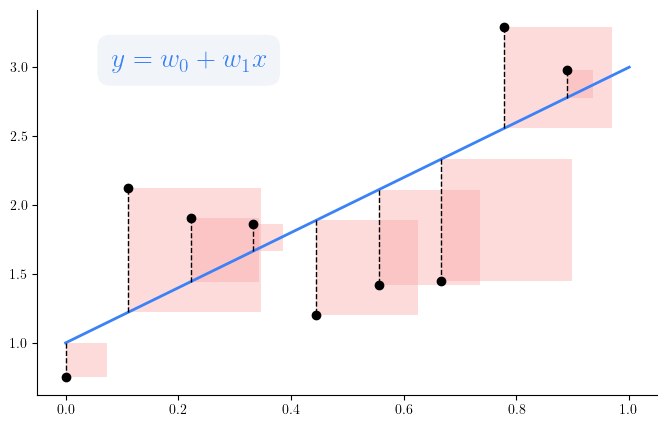!

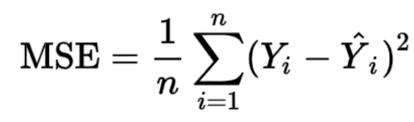

# 🔁 What is Gradient Descent?

Gradient Descent is a method to update weights (w, b) in such a way that loss gets minimized step-by-step.

### Update Rule:
- w = w - learning_rate * (∂Loss/∂w)
- b = b - learning_rate * (∂Loss/∂b)

This process is repeated in a loop until the model gets good at predicting.

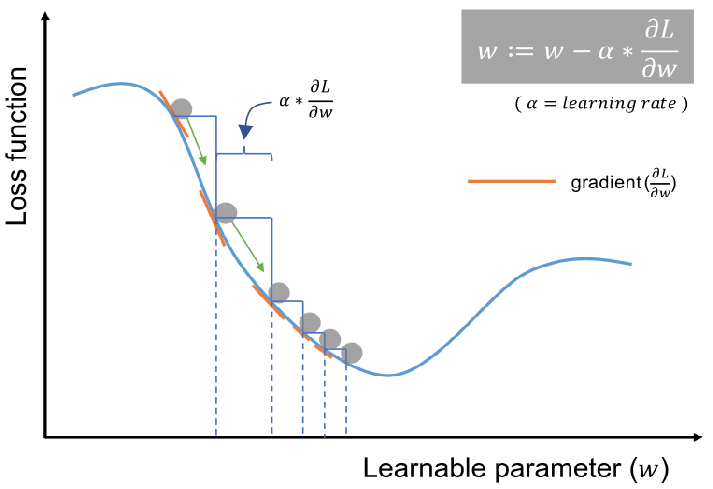

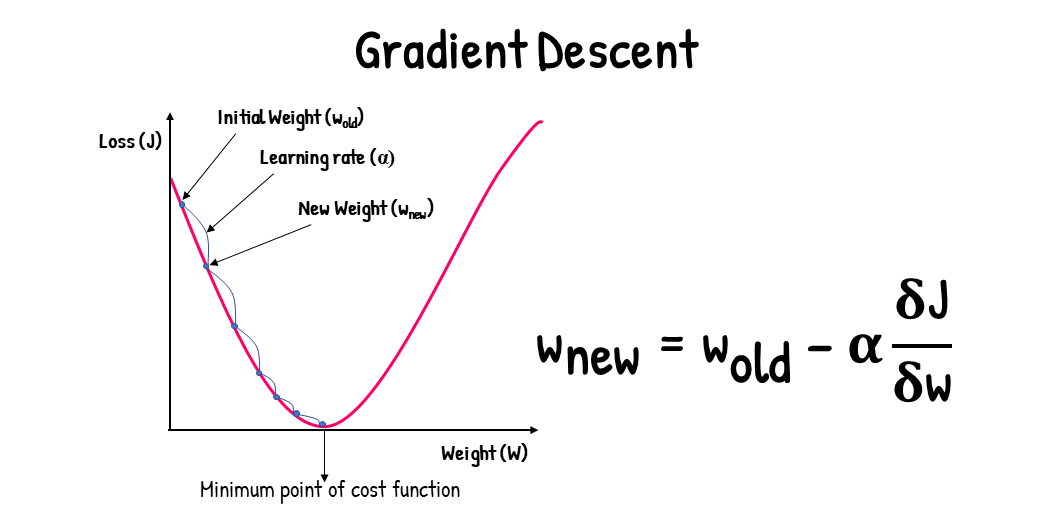

In [ ]:
# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # y = 2x, perfect line

# Initialize weights
w = 0.0
b = 0.0
lr = 0.01  # learning rate

In [ ]:
# Training loop
for epoch in range(100):
    y_pred = w * x + b
    loss = np.mean((y - y_pred) ** 2)

    dw = -2 * np.mean(x * (y - y_pred))
    db = -2 * np.mean(y - y_pred)

    w -= lr * dw
    b -= lr * db

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")


Epoch 0: Loss = 44.0000, w = 0.4400, b = 0.1200
Epoch 10: Loss = 0.2435, w = 1.7674, b = 0.4693
Epoch 20: Loss = 0.0430, w = 1.8609, b = 0.4774
Epoch 30: Loss = 0.0393, w = 1.8713, b = 0.4631
Epoch 40: Loss = 0.0367, w = 1.8759, b = 0.4478
Epoch 50: Loss = 0.0343, w = 1.8801, b = 0.4329
Epoch 60: Loss = 0.0321, w = 1.8841, b = 0.4185
Epoch 70: Loss = 0.0300, w = 1.8880, b = 0.4045
Epoch 80: Loss = 0.0280, w = 1.8917, b = 0.3911
Epoch 90: Loss = 0.0262, w = 1.8953, b = 0.3780


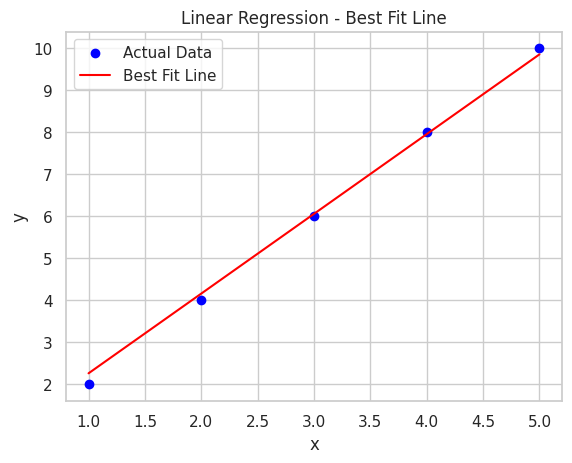

In [ ]:
# Plot the best fit line
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, w*x + b, color='red', label='Best Fit Line')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression - Best Fit Line")
plt.legend()
plt.show()

# Variants of Gradient Descent
📦 Variants:

    Batch Gradient Descent: Uses all training data in each step.

    Stochastic Gradient Descent (SGD): Uses one sample at a time (faster, noisier).

    Mini-Batch Gradient Descent: Uses a subset of data per step — best of both worlds.

# 📂 Let's use a real-world dataset: House Prices Dataset

We'll use Kaggle's House Prices dataset to predict sale price using Linear Regression.

In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

In [ ]:
# Check for missing values
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


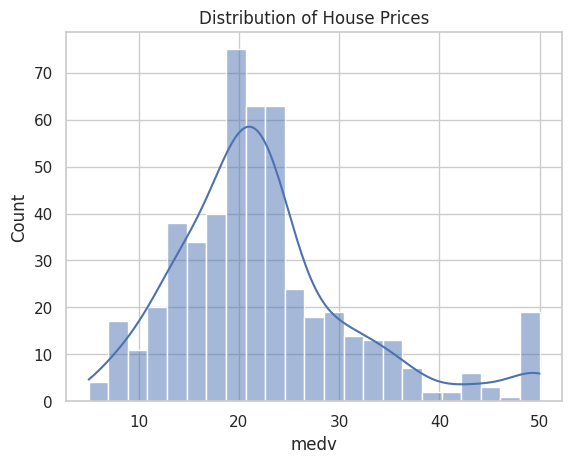

In [ ]:
# Visualize target distribution
sns.histplot(df['medv'], kde=True)
plt.title("Distribution of House Prices")
plt.show()


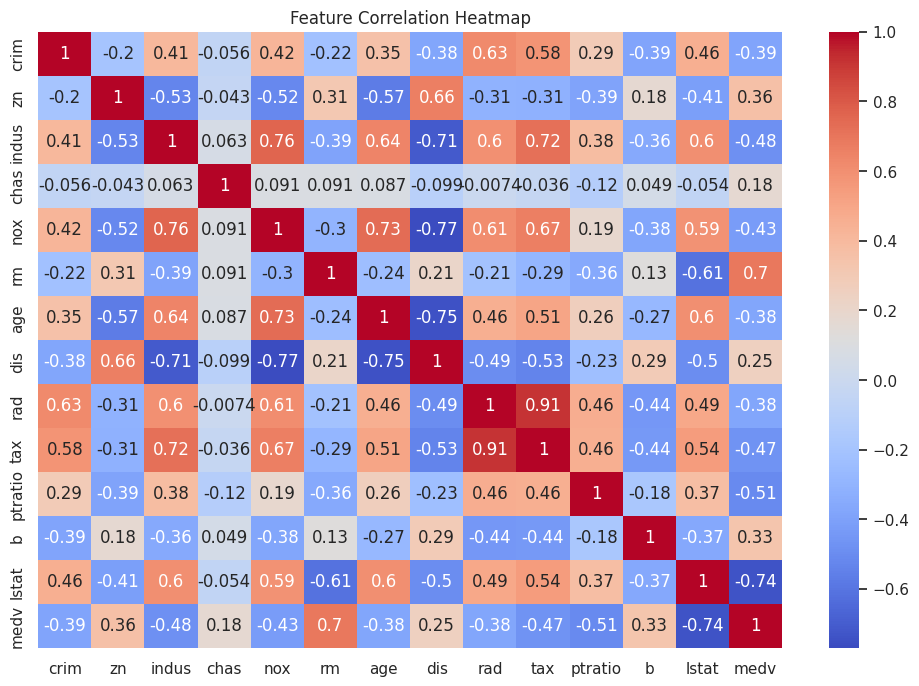

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
X = df.drop("medv", axis=1)
y = df["medv"]

In [ ]:
# Feature scaling (important for Ridge/Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

print("Linear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression Results:
Mean Squared Error: 24.291119474973513
R2 Score: 0.668759493535632


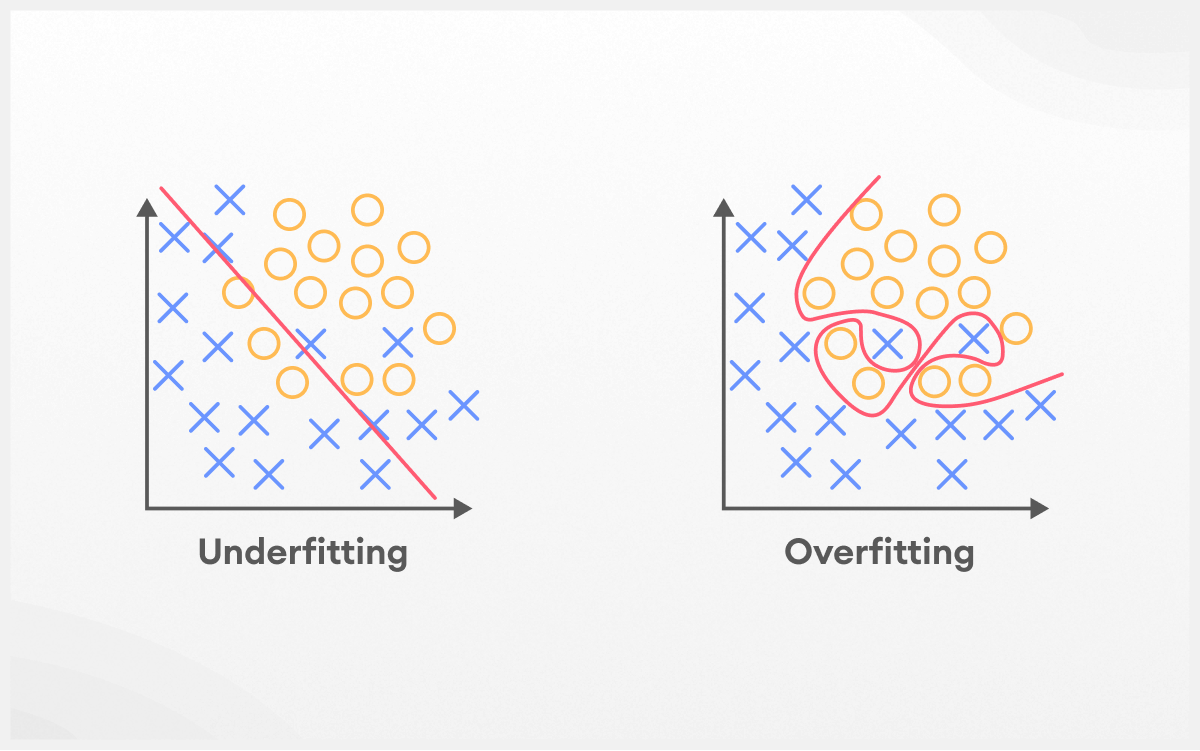

# 🧱 Ridge Regression (L2 Regularization)

Ridge adds a penalty to the loss function based on the square of the magnitude of the coefficients:
Loss = MSE + alpha * sum(w^2)

This helps prevent overfitting and keeps weights small.

In [ ]:

ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
print("\nRidge Regression Results:")
print("Best Alpha:", ridge_model.alpha_)
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))



Ridge Regression Results:
Best Alpha: 1.0
MSE: 24.314537463956363
R2 Score: 0.6684401592810273


# 🧱 Lasso Regression (L1 Regularization)

Lasso adds a penalty based on the absolute value of the coefficients:
Loss = MSE + alpha * sum(|w|)

It can even shrink some weights to zero, performing feature selection.

In [ ]:
lasso_model = LassoCV(alphas=[0.01, 0.1, 1.0], cv=5)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
print("\nLasso Regression Results:")
print("Best Alpha:", lasso_model.alpha_)
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))



Lasso Regression Results:
Best Alpha: 0.01
MSE: 24.335314842365992
R2 Score: 0.6681568331315471


# Polynomial Regression

In [ ]:
best_degree = 0
best_score = -np.inf

for degree in range(2, 6):
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(poly_model, X_scaled, y, scoring='r2', cv=5)
    mean_score = scores.mean()
    print(f"Degree {degree} R2 Score: {mean_score:.4f}")
    if mean_score > best_score:
        best_score = mean_score
        best_degree = degree

print(f"✅ Best Polynomial Degree: {best_degree} with R2: {best_score:.4f}")


Degree 2 R2 Score: -2.2372
Degree 3 R2 Score: -2962357.4529
Degree 4 R2 Score: -1668.3837
Degree 5 R2 Score: -198.3272
✅ Best Polynomial Degree: 2 with R2: -2.2372


In [ ]:
poly_pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)


In [ ]:
print("\nPolynomial Regression (Degree 2) Results:")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R2 Score:", r2_score(y_test, y_pred_poly))



Polynomial Regression (Degree 2) Results:
MSE: 14.257338168909564
R2 Score: 0.8055829447972152


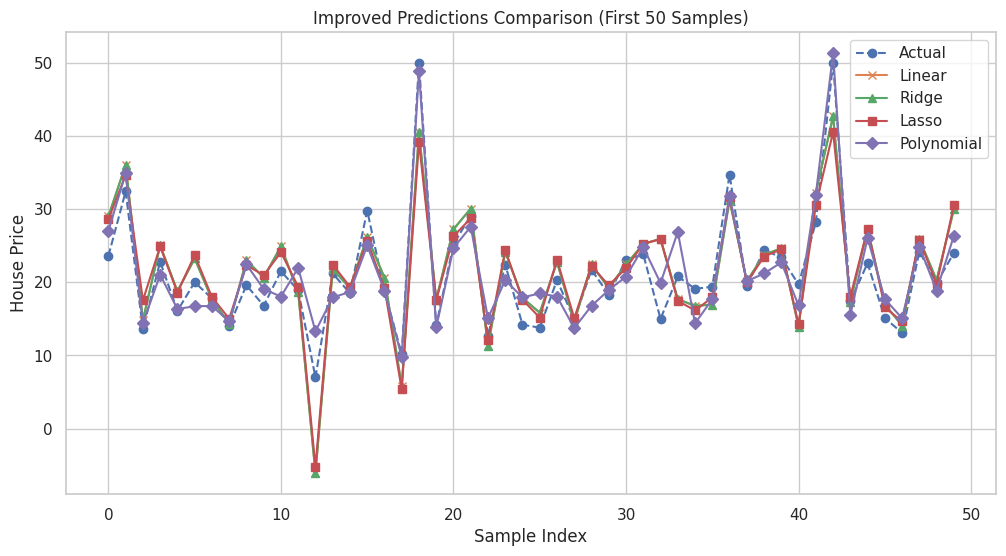

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='--')
plt.plot(y_pred[:50], label='Linear', marker='x')
plt.plot(y_pred_ridge[:50], label='Ridge', marker='^')
plt.plot(y_pred_lasso[:50], label='Lasso', marker='s')
plt.plot(y_pred_poly[:50], label='Polynomial', marker='D')
plt.title("Improved Predictions Comparison (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Polynomial Regression and Hyperparameter Tuning (Modified) ---

# Polynomial Regression (Degree 2) with Ridge (L2) Regularization
poly_ridge_model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha=1.0)) # You can tune alpha
poly_ridge_model.fit(X_train, y_train)
y_pred_poly_ridge = poly_ridge_model.predict(X_test)

print("\nPolynomial Regression (Degree 2) with Ridge Regularization Results:")
print("MSE:", mean_squared_error(y_test, y_pred_poly_ridge))
print("R2 Score:", r2_score(y_test, y_pred_poly_ridge))

# Polynomial Regression (Degree 2) with Lasso (L1) Regularization
poly_lasso_model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso(alpha=0.01)) # You can tune alpha
poly_lasso_model.fit(X_train, y_train)
y_pred_poly_lasso = poly_lasso_model.predict(X_test)

print("\nPolynomial Regression (Degree 2) with Lasso Regularization Results:")
print("MSE:", mean_squared_error(y_test, y_pred_poly_lasso))
print("R2 Score:", r2_score(y_test, y_pred_poly_lasso))

# Original Polynomial Regression (Degree 2) for comparison
poly_model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print("\nPolynomial Regression (Degree 2) Results (without regularization):")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R2 Score:", r2_score(y_test, y_pred_poly))


Polynomial Regression (Degree 2) with Ridge Regularization Results:
MSE: 13.471790040492612
R2 Score: 0.8162948990229992

Polynomial Regression (Degree 2) with Lasso Regularization Results:
MSE: 13.650946660992119
R2 Score: 0.8138518691835617

Polynomial Regression (Degree 2) Results (without regularization):
MSE: 14.257338168909488
R2 Score: 0.8055829447972161


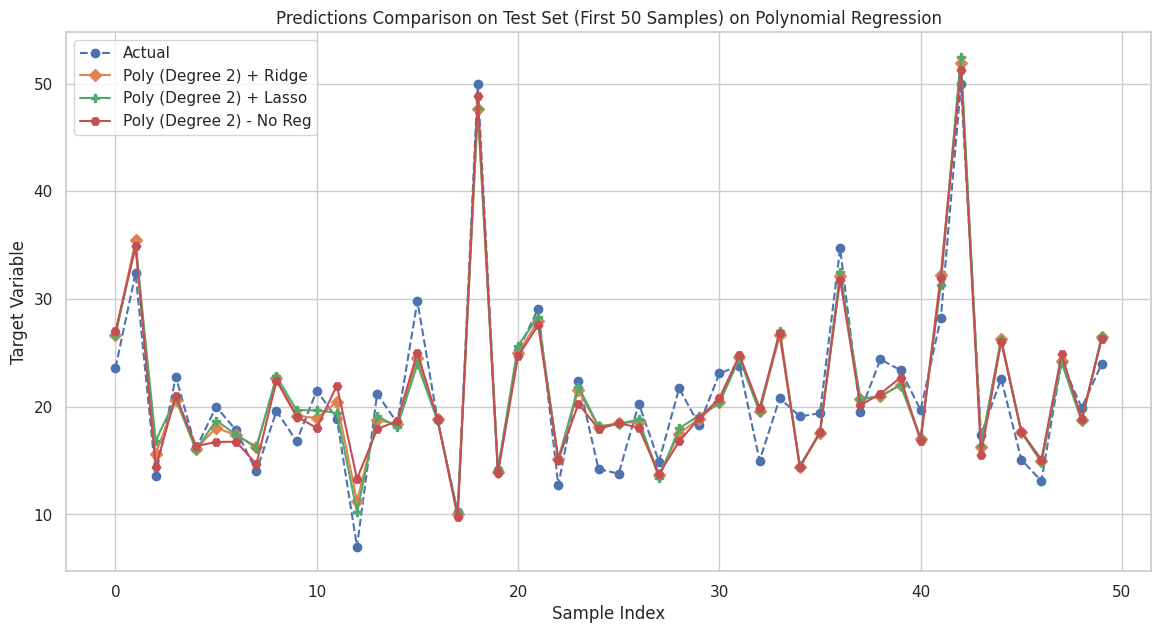

In [ ]:
# Visualization of Predictions (Modified) ---

plt.figure(figsize=(14, 7)) # Increased figure size slightly for better readability
plt.plot(y_test.values[:50], label='Actual', marker='o', linestyle='--')
plt.plot(y_pred_poly_ridge[:50], label='Poly (Degree 2) + Ridge', marker='D') # Plotting poly + ridge
plt.plot(y_pred_poly_lasso[:50], label='Poly (Degree 2) + Lasso', marker='P') # Plotting poly + lasso (using a different marker)
plt.plot(y_pred_poly[:50], label='Poly (Degree 2) - No Reg', marker='H') # Plotting original poly (using a different marker and updated label)


plt.title("Predictions Comparison on Test Set (First 50 Samples) on Polynomial Regression") # Updated title
plt.xlabel("Sample Index")
plt.ylabel("Target Variable") # Generic label for target variable
plt.legend()
plt.grid(True)
plt.show()

# ✅ Conclusion

- Feature scaling (standardization) significantly improves regularized models.
- Ridge and Lasso benefit from cross-validation to choose best alpha.
- Polynomial regression captures non-linearity, giving better results on some datasets.
- Visual comparison helps identify model behavior and improvement.

📌 Tip: Always try multiple models and use cross-validation + EDA to tune performance.


##  How Can You Improve Further?

    Feature Engineering:

        Create interaction terms or new features (e.g., rm*dis, log(crim)).

        Normalize skewed features like crim, lstat.

    Model Choice:

        Try tree-based models like Random Forest or Gradient Boosting (XGBoost, LightGBM).

        These often outperform polynomial regression, especially on tabular data.

    Hyperparameter Tuning:

        Use cross-validation and GridSearchCV to optimize regularization strength, polynomial degree, etc.

    Polynomial Degree:

        Degree 2 is usually safe, but try 3 (cautiously — it can overfit fast).

    Outlier Handling:

        Investigate high-residual data points — clean or transform if needed.